In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
from pyemma.util.contexts import settings
import sklearn.preprocessing as pre

/home/mikejones/anaconda3/lib/python3.7/site-packages/mdshare/repository.py:53: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = load(fh)


In [80]:
#hde_coords = transform

#assign equilibrium data from 
#npy_name = 'mdtraj-pwdr-allseq_15ts_15e+09run_AT-all_308K-10-150001-190.npy'
#npy_name = 'mdtraj-pwdr-allseq_15ts_15e+09run_GC-end_315K-10-150001-190.npy'

#npy_name = 'mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.npy'
#npy_name = 'mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.npy'
#npy_name = 'mdtraj-pwdr-20KL_GC-end_300K-148-10000-190.npy'
#npy_name = 'mdtraj-pwdr-20KL_GC-mid_309K-103-10000-190.npy'

'''
name_list = ['mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.npy',
            'mdtraj-pwdr-20KL_GC-end_300K-148-10000-190.npy',
            'mdtraj-pwdr-20KL_GC-mid_309K-103-10000-190.npy',
            'mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.npy']
'''

name_list = ['mdtraj-pwdr-allseq_15ts_15e+09run_AT-all_308K-10-150001-190.npy',
            'mdtraj-pwdr-allseq_15ts_15e+09run_GC-end_315K-10-150001-190.npy',
            'mdtraj-pwdr-allseq_15ts_15e+09run_GC-mid_324K-10-150001-190.npy',
            'mdtraj-pwdr-allseq_15ts_15e+09run_GC-core_325K-10-150001-190.npy']

load_path = '/home/mikejones/scratch-midway2/srv/dna_data/' + npy_name
pwd_features = np.load(load_path)[:86]

Text(0, 0.5, 'TICA dimensions')

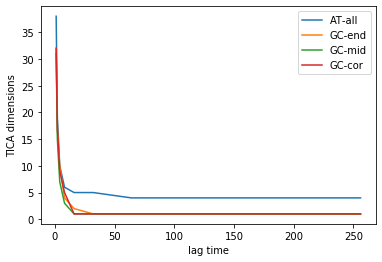

In [81]:
## run loop through various sequences and lag times to evaluate how
## TICA dimensionality reduction is affected

for npy_name in name_list:
    
    #load distances
    load_path = '/home/mikejones/scratch-midway2/srv/dna_data/' + npy_name
    pwd_features = np.load(load_path)[:86]
    
    # reshapes features into scaled list
    pwd_features_c = np.concatenate(pwd_features)
    scaler = pre.MinMaxScaler(feature_range=(0, 1))
    scaler.fit(pwd_features_c)

    # saved scaled for both concatenated and list format
    pwd_features_s = [scaler.transform(item) for item in pwd_features] 
    pwd_features_sc = scaler.transform(pwd_features_c)

    lag_list = [2**i for i in range(9)]
    dim_list = []

    for lag in lag_list:

        tica = pyemma.coordinates.tica(pwd_features_s, lag=lag)
        tica_output = tica.get_output()
        tica_concatenated = np.concatenate(tica_output)
        dim_list.append(len(tica_output[0][0]))
        
    plt.plot(lag_list, dim_list, label=npy_name.replace('mdtraj-pwdr-allseq_15ts_15e+09run_', '')[:6])
    
plt.legend()
plt.xlabel('lag time')
plt.ylabel('TICA dimensions')


In [ ]:
#load distances
#npy_name = 'mdtraj-pwdr-allseq_15ts_15e+09run_AT-all_308K-10-150001-190.npy'
#npy_name = 'mdtraj-pwdr-allseq_15ts_15e+09run_GC-core_325K-10-150001-190.npy'
npy_name = 'mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.npy'
#npy_name = 'mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.npy'
load_path = '/home/mikejones/scratch-midway2/srv/dna_data/' + npy_name
pwd_features = np.load(load_path)# [:, 4800:5200]
lag = 2

# reshapes features into scaled list
pwd_features_c = np.concatenate(pwd_features)
scaler = pre.MinMaxScaler(feature_range=(0, 1))
scaler.fit(pwd_features_c)

# saved scaled for both concatenated and list format
pwd_features_s = [scaler.transform(item) for item in pwd_features] 
pwd_features_sc = scaler.transform(pwd_features_c)

# calculate tica coordinates
tica = pyemma.coordinates.tica(pwd_features_s, lag=lag)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)


In [ ]:
print(np.shape(tica_output))

18-03-20 18:56:24 pyemma.coordinates.clustering.kmeans.KmeansClustering[759] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
18-03-20 18:57:11 pyemma.coordinates.clustering.kmeans.KmeansClustering[767] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
18-03-20 18:57:33 pyemma.coordinates.clustering.kmeans.KmeansClustering[771] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
18-03-20 18:58:21 pyemma.coordinates.clustering.kmeans.KmeansClustering[779] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
18-03-20 19:00:33 pyemma.coordinates.clustering.kmeans.KmeansClustering[799] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


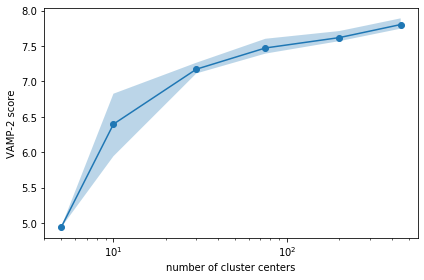

In [88]:
## scoring based on different cluster centers

n_clustercenters = [5, 10, 30, 75, 200, 450]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, lag)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()

In [ ]:
## cluster data
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

In [ ]:
## visualize clusters

fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

In [ ]:
its = pyemma.msm.its(cluster.dtrajs, lags=50, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);